# Ronin Ecosystem Tracker

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
overall_df = joblib.load("../data/games_overall_activity.joblib")
daily_df = joblib.load("../data/games_daily_activity.joblib")
ronin_daily_df = joblib.load("../data/ronin_daily_activity.joblib")
activation_and_retention_df = joblib.load("../data/ronin_users_weekly_activation_and_retention_for_each_project_or_game.joblib")
ron_current_holders_df = joblib.load("../data/ron_current_holders.joblib")
ron_current_segmented_holders_df = joblib.load("../data/ron_current_segmented_holders.joblib")
wron_active_trade_pairs_df = joblib.load("../data/wron_active_trade_pairs_on_Katana.joblib")
wron_whale_tracking_on_Katana_df = joblib.load("../data/wron_whale_tracking_on_Katana.joblib")
WRON_Trading_Volume_Liquidity_Flow_on_Katana_df = joblib.load("../data/WRON_Trading_Volume_&_Liquidity_Flow_on_Katana.joblib")
WRON_Trading_by_hour_of_day_on_Katana_df = joblib.load("../data/WRON_Trading_by_hour_of_day_on_Katana.joblib")
WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df = joblib.load("../data/WRON_weekly_trade_volume_and_user_segmentation_on_Katana.joblib")
nft_collections_on_sky_mavis = joblib.load("../data/cleaned_nft_collections_on_sky_mavis.joblib")

In [3]:
overall_df

,avg_gas_price_in_gwei,game_project,total_volume_ron_sent_to_game,transaction_count,unique_players
0,24.973777,Pixels,167.028604,235107009,10855202
1,8.141922,Axie Infinity,166920.829219,196364449,8907175
2,18.431888,Lumiterra,1.860900,40570452,2372066
3,19.923888,Wild Forest,0.010100,24332394,889001
4,20.397546,The Machines Arena,0.000000,31590993,385844
5,19.966342,Apeiron,0.000000,33976214,305392
6,19.563052,Ragnarok: Monster World,58.259846,3280718,222798
7,20.000000,Fableborne,0.000000,7062393,110278
8,20.427213,Kongz,255195.704884,1121243,97199
9,20.898040,Pixel HeroZ,3223.715731,1447962,52409


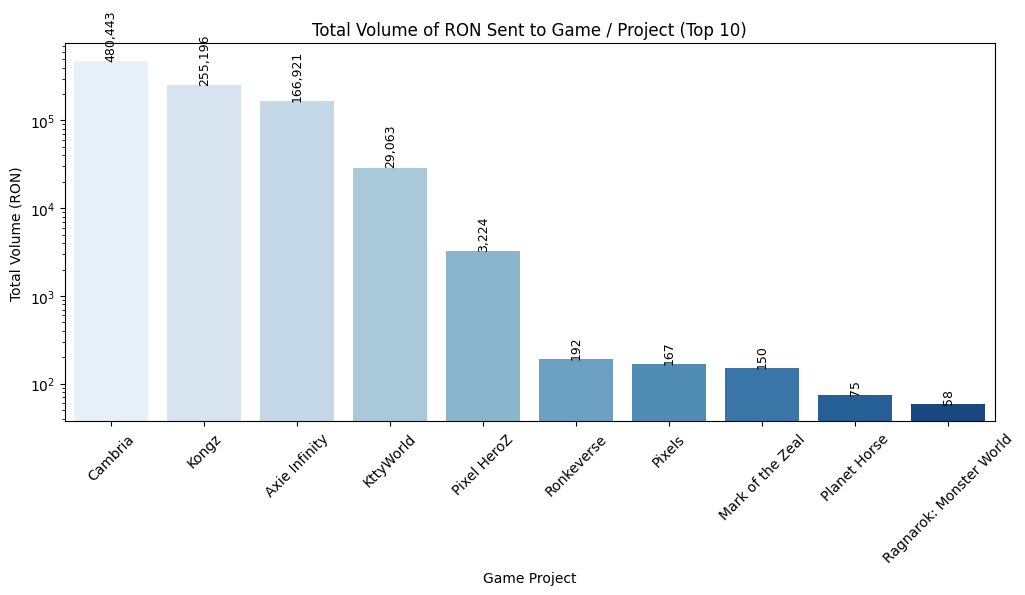

In [4]:
df_sorted_volume = overall_df.sort_values('total_volume_ron_sent_to_game', ascending=False)

top_n = 10
df_top = df_sorted_volume.head(top_n)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top,
    x='game_project',
    y='total_volume_ron_sent_to_game',
    hue='game_project',
    palette='Blues',
    legend=False
)

for i, v in enumerate(df_top['total_volume_ron_sent_to_game']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9, rotation=90)

ax.set_yscale('log')
plt.title('Total Volume of RON Sent to Game / Project (Top 10)')
plt.xlabel('Game Project')
plt.ylabel('Total Volume (RON)')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25)
plt.show()

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_2940\991137351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


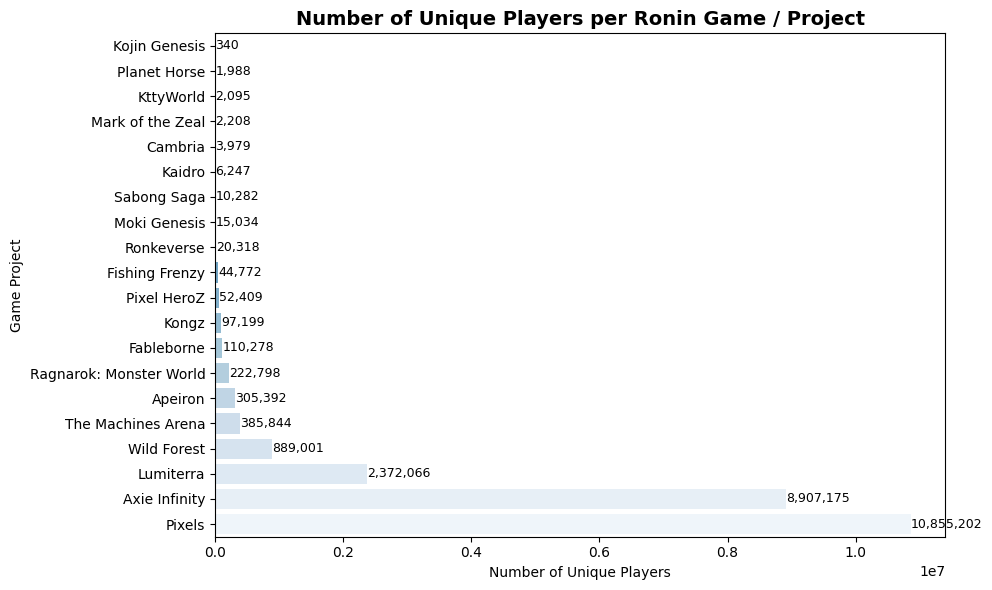

In [6]:
df_sorted_players = overall_df.sort_values('unique_players', ascending=True)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_sorted_players,
    x="unique_players",
    y="game_project",
    palette="Blues_r"  
)


for index, value in enumerate(df_sorted_players["unique_players"]):
    plt.text(
        value, 
        index, 
        f"{value:,.0f}", 
        va="center", 
        ha="left", 
        fontsize=9
    )


plt.title("Number of Unique Players per Ronin Game / Project", fontsize=14, weight="bold")
plt.xlabel("Number of Unique Players")
plt.ylabel("Game Project")

plt.tight_layout()
plt.show()


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_2940\1191450550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


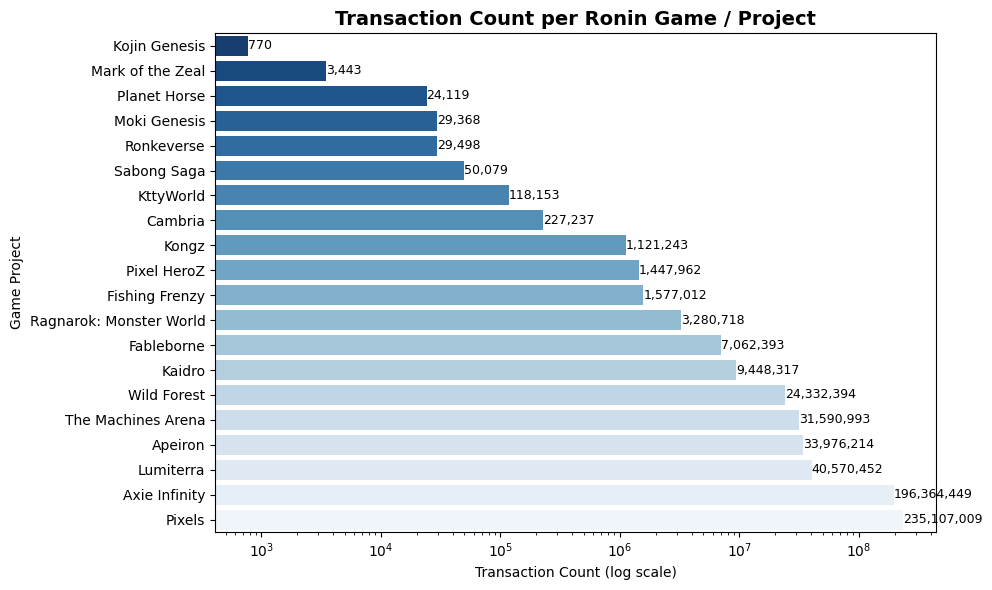

In [7]:
df_sorted_tx = overall_df.sort_values('transaction_count', ascending=True)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_sorted_tx,
    x="transaction_count",
    y="game_project",
    palette="Blues_r"
)


plt.xscale("log")


for index, value in enumerate(df_sorted_tx["transaction_count"]):
    plt.text(
        value, 
        index, 
        f"{value:,.0f}", 
        va="center", 
        ha="left", 
        fontsize=9
    )


plt.title("Transaction Count per Ronin Game / Project", fontsize=14, weight="bold")
plt.xlabel("Transaction Count (log scale)")
plt.ylabel("Game Project")

plt.tight_layout()
plt.show()


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_2940\4090165393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


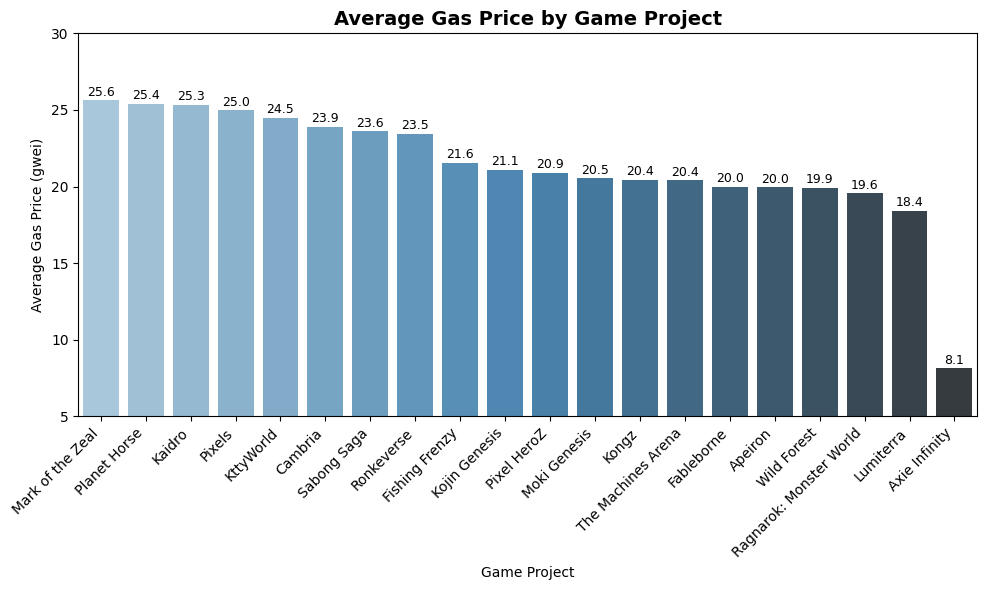

In [8]:
df_sorted_gas = overall_df.sort_values('avg_gas_price_in_gwei', ascending=False)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_sorted_gas,
    x="game_project",
    y="avg_gas_price_in_gwei",
    palette="Blues_d"
)


for index, value in enumerate(df_sorted_gas["avg_gas_price_in_gwei"]):
    plt.text(
        index, 
        value + 0.3,  
        f"{value:.1f}", 
        ha="center", 
        fontsize=9
    )


plt.title("Average Gas Price by Game Project", fontsize=14, weight="bold")
plt.xlabel("Game Project")
plt.ylabel("Average Gas Price (gwei)")


plt.xticks(rotation=45, ha="right")


plt.ylim(5, 30)

plt.tight_layout()
plt.show()

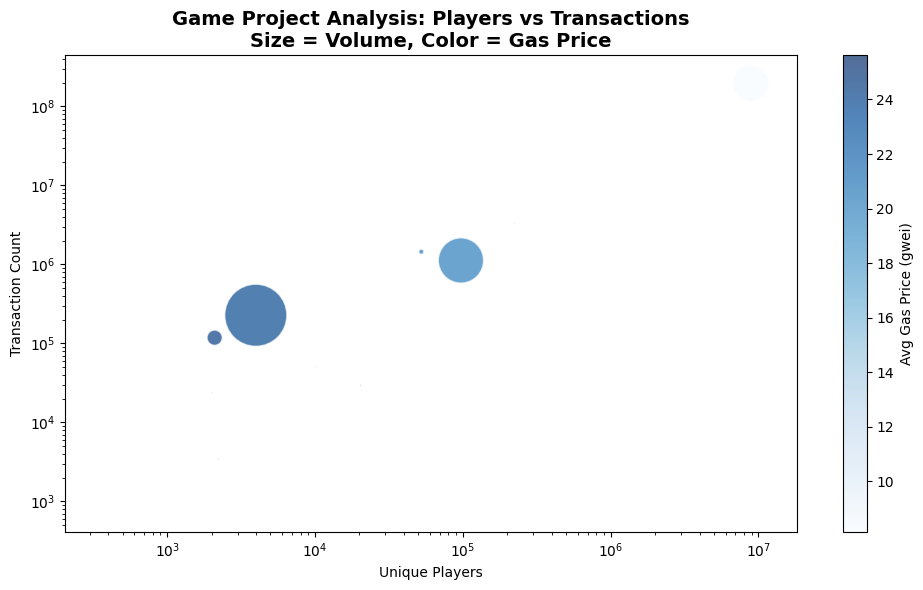

In [9]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    overall_df["unique_players"],
    overall_df["transaction_count"],
    s=overall_df["total_volume_ron_sent_to_game"] / overall_df["total_volume_ron_sent_to_game"].max() * 2000,
    c=overall_df["avg_gas_price_in_gwei"],
    cmap="Blues",
    alpha=0.7,
    edgecolors="w"
)

plt.xscale("log")
plt.yscale("log")

plt.colorbar(scatter, label="Avg Gas Price (gwei)")
plt.title("Game Project Analysis: Players vs Transactions\nSize = Volume, Color = Gas Price", fontsize=14, weight="bold")
plt.xlabel("Unique Players")
plt.ylabel("Transaction Count")

plt.tight_layout()
plt.show()


In [171]:
ronin_daily_df
ronin_daily_df['day'] = pd.to_datetime(ronin_daily_df['day']).dt.date
ronin_daily_df

,active_wallets,avg_gas_price_in_gwei,daily_transactions,day
0,131095,24.468557,226918,2025-09-22
1,297419,28.215287,649393,2025-09-21
2,278990,20.698995,603143,2025-09-20
3,292172,21.680591,632274,2025-09-19
4,294985,21.385652,705545,2025-09-18
...,...,...,...,...
1695,2,1.000000,2,2021-01-29
1696,1,1.000000,4,2021-01-28
1697,2,0.005634,355,2021-01-27
1698,5,0.000000,12,2021-01-26


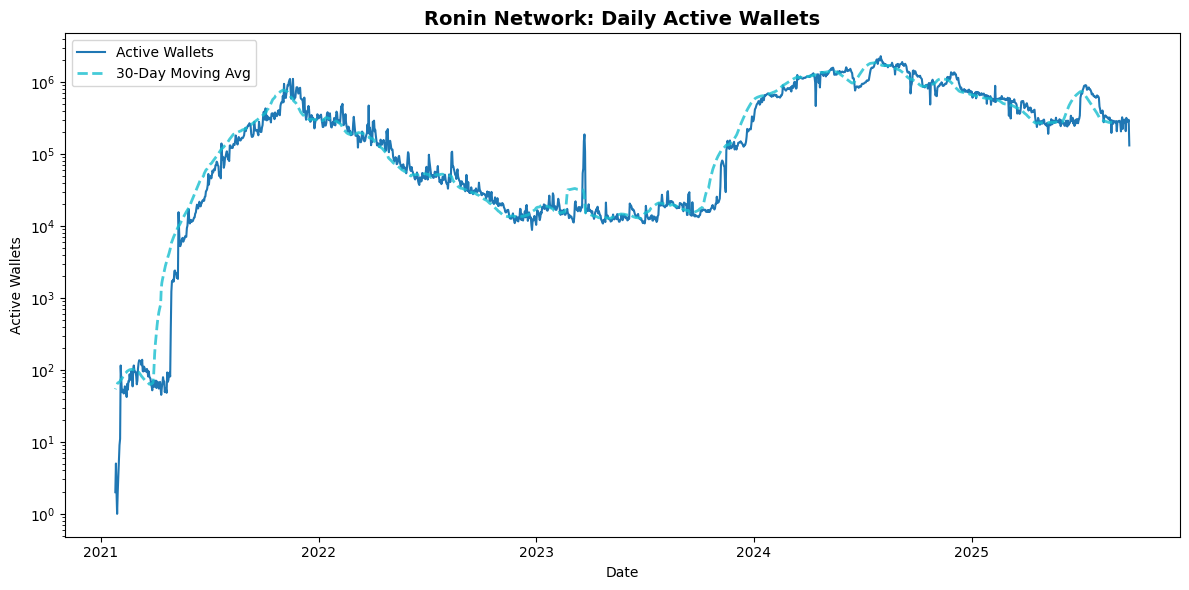

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(
    ronin_daily_df["day"],
    ronin_daily_df["active_wallets"],
    color="#1f77b4",
    label="Active Wallets"
)
plt.plot(
    ronin_daily_df["day"],
    ronin_daily_df["active_wallets"].rolling(window=30).mean(),
    color="#17becf",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="30-Day Moving Avg"
)

plt.yscale("log")
plt.title("Ronin Network: Daily Active Wallets", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Active Wallets")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


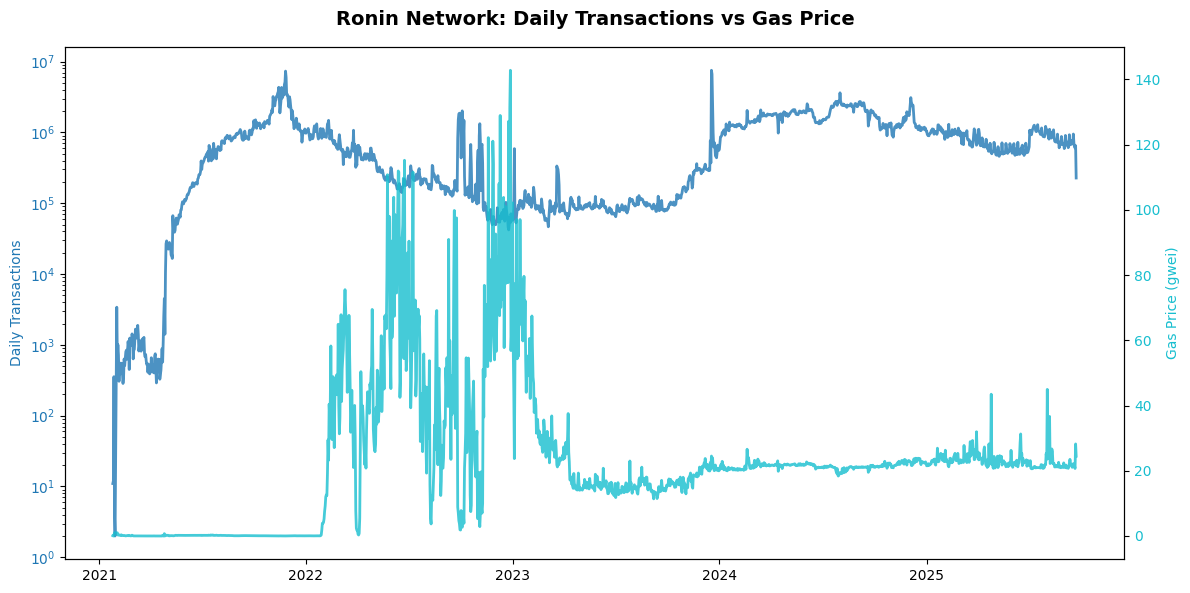

In [173]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(
    ronin_daily_df["day"],
    ronin_daily_df["daily_transactions"],
    color="#1f77b4",
    linewidth=2,
    alpha=0.8,
    label="Daily Transactions"
)
ax1.set_yscale("log")
ax1.set_ylabel("Daily Transactions", color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")

ax2 = ax1.twinx()
ax2.plot(
    ronin_daily_df["day"],
    ronin_daily_df["avg_gas_price_in_gwei"],
    color="#17becf",
    linewidth=2,
    alpha=0.8,
    label="Avg Gas Price (gwei)"
)
ax2.set_ylabel("Gas Price (gwei)", color="#17becf")
ax2.tick_params(axis="y", labelcolor="#17becf")

fig.suptitle("Ronin Network: Daily Transactions vs Gas Price", fontsize=14, weight="bold")
fig.tight_layout()
plt.show()


In [174]:
activation_and_retention_df

,% retention 1 week later,% retention 10 weeks later,% retention 11 weeks later,% retention 12 weeks later,% retention 2 weeks later,% retention 3 weeks later,% retention 4 weeks later,% retention 5 weeks later,% retention 6 weeks later,% retention 7 weeks later,% retention 8 weeks later,% retention 9 weeks later,cohort week,game_project,new users
0,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-30 00:00:00.000 UTC,Apeiron,5
1,23.076923,15.384615,NaN,NaN,23.076923,30.769231,23.076923,23.076923,23.076923,23.076923,23.076923,15.384615,2025-07-07 00:00:00.000 UTC,Apeiron,13
2,25.000000,NaN,NaN,NaN,25.000000,25.000000,12.500000,12.500000,12.500000,NaN,NaN,NaN,2025-07-14 00:00:00.000 UTC,Apeiron,8
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-21 00:00:00.000 UTC,Apeiron,3
4,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-28 00:00:00.000 UTC,Apeiron,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,71.428571,NaN,NaN,NaN,63.492063,61.904762,57.142857,11.111111,NaN,NaN,NaN,NaN,2025-08-18 00:00:00.000 UTC,Wild Forest,63
263,59.375000,NaN,NaN,NaN,56.250000,50.000000,12.500000,NaN,NaN,NaN,NaN,NaN,2025-08-25 00:00:00.000 UTC,Wild Forest,32
264,63.414634,NaN,NaN,NaN,51.219512,14.634146,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-01 00:00:00.000 UTC,Wild Forest,41
265,63.888889,NaN,NaN,NaN,13.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-08 00:00:00.000 UTC,Wild Forest,36


In [175]:
ron_current_holders_df

,current $RON balance,wallet
0,1.220909e+08,0x7cf0fb64d72b733695d77d197c664e90d07cf45a
1,2.872437e+07,0x7c645c35ab772be52a474b1e08414d55e8ea56d5
2,2.759247e+07,0xc05afc8c9353c1dd5f872eccfacd60fd5a2a9ac7
3,1.320576e+07,0xcad9e7aa2c3ef07bad0a7b69f97d059d8f36edd2
4,1.205962e+07,0x90f31f1907a4d1443a6aacdc91ac2312f91bafa7
...,...,...
16890,1.000000e-18,0xc6dda141675149ee761e02159d5028b638b146cb
16891,1.000000e-18,0x513bc97627959f9a95aad08ba497f46d1e2e557c
16892,1.000000e-18,0xed36a10c2eac17d1b4ee15330b6c075c48996bb3
16893,1.000000e-18,0x20d171128a1159f3e5d6affb140c7eeacd621d54


In [176]:
ron_current_segmented_holders_df

,holders,tier
0,17,🐋 Whale (1M+ $RON)
1,26,🦈 Shark (100k–1M $RON)
2,136,🐬 Dolphin (10k–100k $RON)
3,713,🐟 Fish (1k–10k $RON)
4,3375,🦀 Crab (100–1k $RON)
5,12628,🦐 Shrimp (<100 $RON)


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 128011 (\N{WHALE}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 129416 (\N{SHARK}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 128044 (\N{DOLPHIN}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 128031 (\N{FISH}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 129408 (\N{CRAB}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\144158664.py:26: UserWarning:

Glyph 129424 (\N{SHRIMP}) missing from font(s) DejaVu Sans.

c:\Users\Jo$h\Desktop\Visual Studio Code\Ronin Ecosystem\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128011 (\N{WHALE}) missing 

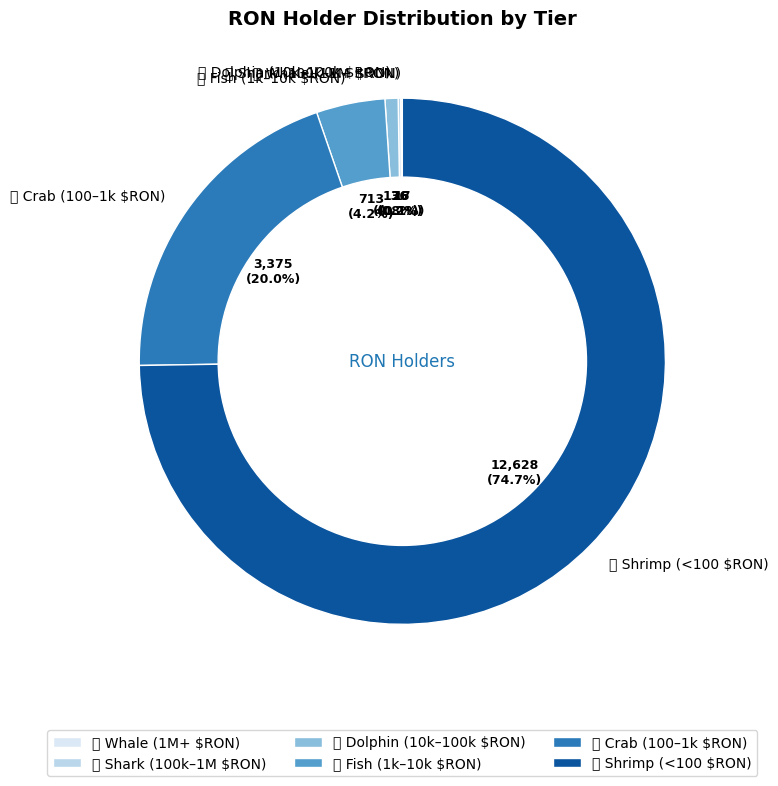

In [177]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Blues", len(ron_current_segmented_holders_df))

wedges, texts, autotexts = plt.pie(
    ron_current_segmented_holders_df["holders"],
    labels=ron_current_segmented_holders_df["tier"],
    autopct=lambda p: f"{int(p * sum(ron_current_segmented_holders_df['holders']) / 100):,}\n({p:.1f}%)",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor="white")
)

plt.setp(autotexts, size=9, weight="bold", color="black")
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color="white", fc="white"))

plt.text(0, 0, "RON Holders", ha="center", va="center", fontsize=12, color="#1f77b4")
plt.title("RON Holder Distribution by Tier", fontsize=14, weight="bold")

plt.legend(
    ron_current_segmented_holders_df["tier"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=3
)

plt.tight_layout()
plt.show()


In [178]:
wron_active_trade_pairs_df

,Active Pairs,Active Pairs Link,Active Traders,Total Trade Volume (USD),Total Transactions,Volume to trader ratio,Volume to transaction ratio
0,WETH-WRON,<a href=https://app.roninchain.com/address/0x2...,682932,2.252661e+09,5027783,3.298515e+03,4.480427e+02
1,USDC-WRON,<a href=https://app.roninchain.com/address/0x4...,302686,1.498090e+09,3099096,4.949321e+03,4.833959e+02
2,AXS-WRON,<a href=https://app.roninchain.com/address/0x3...,208884,7.160831e+08,2323828,3.428138e+03,3.081481e+02
3,SLP-WRON,<a href=https://app.roninchain.com/address/0x8...,181950,3.897353e+08,1341832,2.141991e+03,2.904501e+02
4,PIXEL-WRON,<a href=https://app.roninchain.com/address/0xb...,275003,1.689091e+08,1146855,6.142083e+02,1.472803e+02
...,...,...,...,...,...,...,...
653,CaptainRON-WRON,<a href=https://app.roninchain.com/address/0x4...,1,9.249120e-10,1,9.249120e-10,9.249120e-10
654,RONXBT-WRON,<a href=https://app.roninchain.com/address/0xf...,1,9.249120e-10,1,9.249120e-10,9.249120e-10
655,SBTC-WRON,<a href=https://app.roninchain.com/address/0x4...,1,4.376106e-18,1,4.376106e-18,4.376106e-18
656,ONIGIRI-WRON,<a href=https://app.roninchain.com/address/0xc...,1,9.471680e-19,2,9.471680e-19,4.735840e-19


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\2783607761.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\2783607761.py:29: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\2783607761.py:29: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.

c:\Users\Jo$h\Desktop\Visual Studio Code\Ronin Ecosystem\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.

c:\Users\Jo$h\Desktop\Visual Studio Code\Ronin Ecosystem\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.



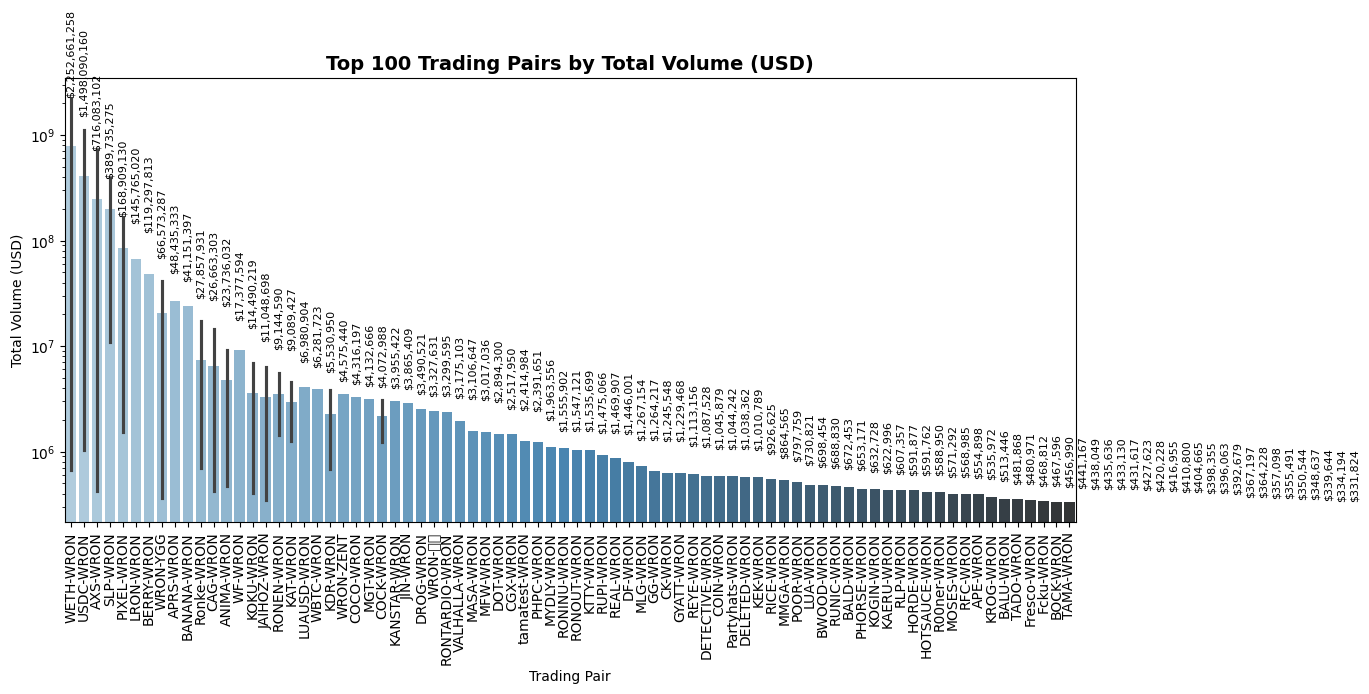

In [179]:
significant_pairs = wron_active_trade_pairs_df[wron_active_trade_pairs_df['Total Trade Volume (USD)'] > 1000]
top_100_volume = significant_pairs.nlargest(100, 'Total Trade Volume (USD)')

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=top_100_volume,
    x="Active Pairs",
    y="Total Trade Volume (USD)",
    palette="Blues_d"
)

plt.yscale("log")
plt.xticks(rotation=90)

for index, value in enumerate(top_100_volume["Total Trade Volume (USD)"]):
    plt.text(
        index,
        value,
        f"${value:,.0f}",
        ha="center",
        va="bottom",
        fontsize=8,
        rotation=90
    )

plt.title("Top 100 Trading Pairs by Total Volume (USD)", fontsize=14, weight="bold")
plt.xlabel("Trading Pair")
plt.ylabel("Total Volume (USD)")
plt.tight_layout()
plt.show()


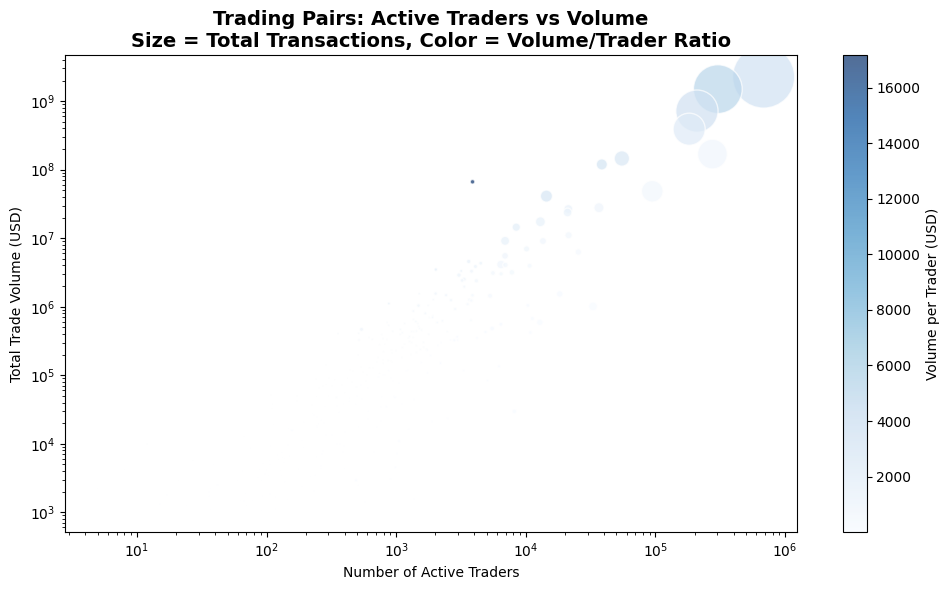

In [180]:
significant_pairs = wron_active_trade_pairs_df[wron_active_trade_pairs_df['Total Trade Volume (USD)'] > 1000]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    significant_pairs["Active Traders"],
    significant_pairs["Total Trade Volume (USD)"],
    s=significant_pairs["Total Transactions"] / significant_pairs["Total Transactions"].max() * 2000,
    c=significant_pairs["Volume to trader ratio"],
    cmap="Blues",
    alpha=0.7,
    edgecolors="w"
)

plt.xscale("log")
plt.yscale("log")

plt.colorbar(scatter, label="Volume per Trader (USD)")
plt.title("Trading Pairs: Active Traders vs Volume\nSize = Total Transactions, Color = Volume/Trader Ratio", fontsize=14, weight="bold")
plt.xlabel("Number of Active Traders")
plt.ylabel("Total Trade Volume (USD)")

plt.tight_layout()
plt.show()


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\1881939820.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\1881939820.py:28: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.

C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\1881939820.py:28: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.

c:\Users\Jo$h\Desktop\Visual Studio Code\Ronin Ecosystem\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.

c:\Users\Jo$h\Desktop\Visual Studio Code\Ronin Ecosystem\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.



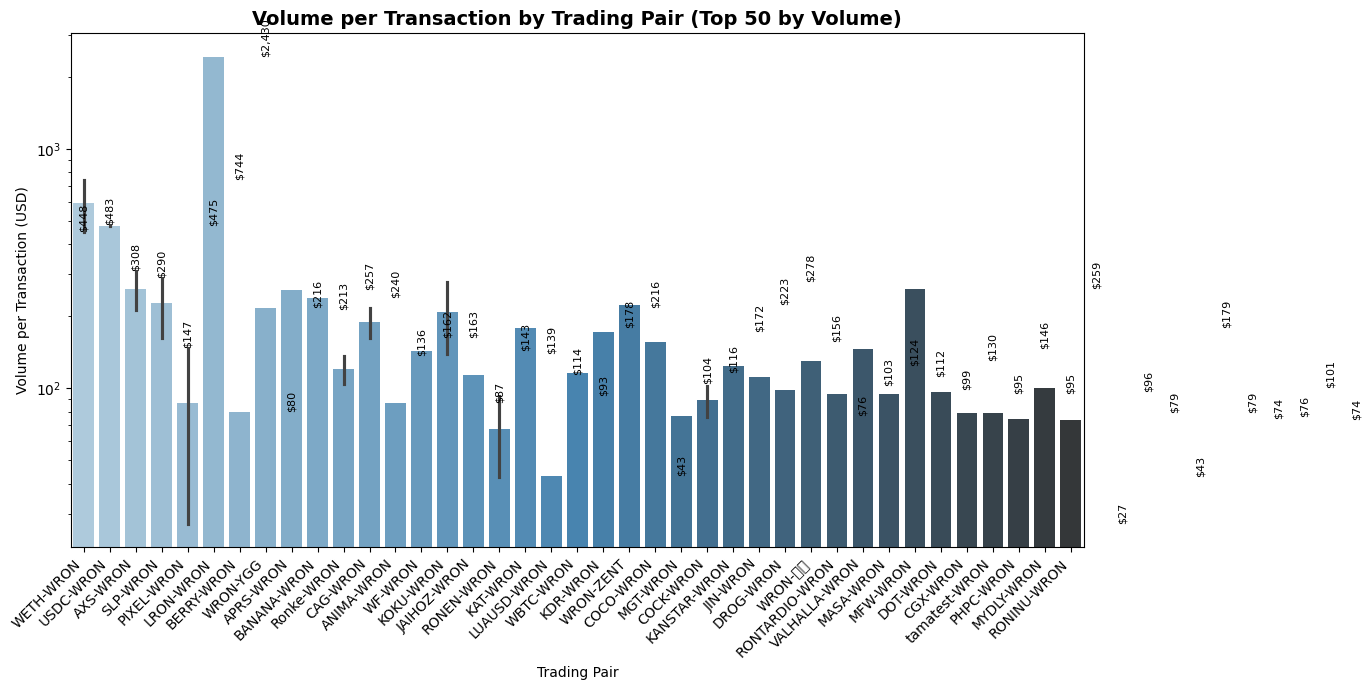

In [181]:
top_50 = significant_pairs.nlargest(50, "Total Trade Volume (USD)")

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=top_50,
    x="Active Pairs",
    y="Volume to transaction ratio",
    palette="Blues_d"
)

plt.yscale("log")
plt.xticks(rotation=45, ha="right")

for index, value in enumerate(top_50["Volume to transaction ratio"]):
    plt.text(
        index,
        value,
        f"${value:,.0f}",
        ha="center",
        va="bottom",
        fontsize=8,
        rotation=90
    )

plt.title("Volume per Transaction by Trading Pair (Top 50 by Volume)", fontsize=14, weight="bold")
plt.xlabel("Trading Pair")
plt.ylabel("Volume per Transaction (USD)")
plt.tight_layout()
plt.show()


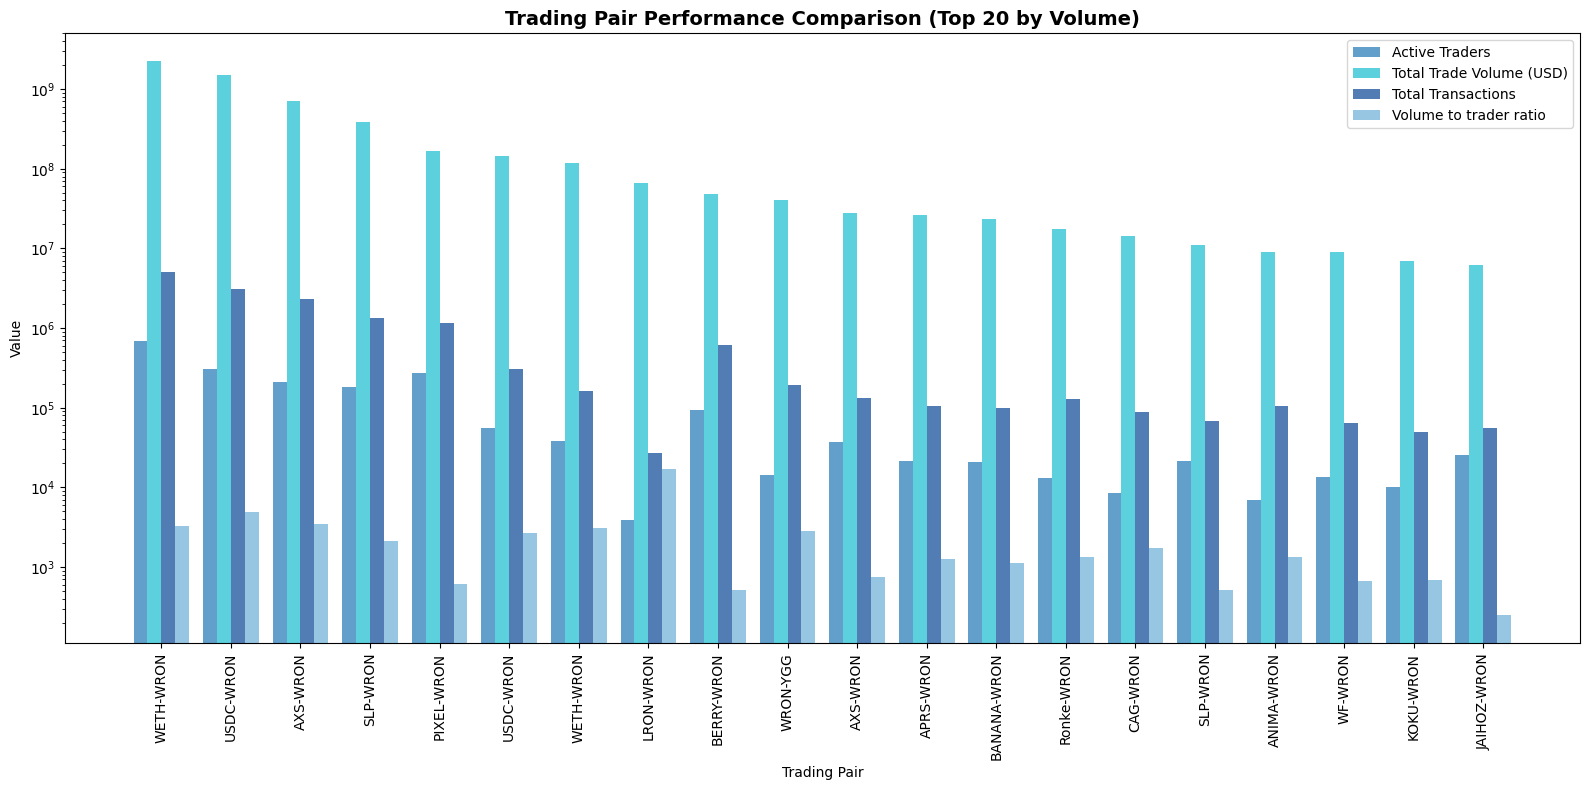

In [182]:
top_20_pairs = significant_pairs.nlargest(20, "Total Trade Volume (USD)")

metrics = ["Active Traders", "Total Trade Volume (USD)", "Total Transactions", "Volume to trader ratio"]
colors = ["#1f77b4", "#17becf", "#084594", "#6baed6"]

plt.figure(figsize=(16, 8))

x = np.arange(len(top_20_pairs["Active Pairs"]))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(
        x + i * width,
        top_20_pairs[metric],
        width=width,
        label=metric,
        color=colors[i % len(colors)],
        alpha=0.7
    )

plt.yscale("log")
plt.xticks(x + width * (len(metrics) - 1) / 2, top_20_pairs["Active Pairs"], rotation=90)
plt.title("Trading Pair Performance Comparison (Top 20 by Volume)", fontsize=14, weight="bold")
plt.xlabel("Trading Pair")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
wron_whale_tracking_on_Katana_df

,avg trade size (USD),largest trade volume (USD),primary activity,total trade volume (USD),total trades,"trader (whale) who traded over $10,000 in the last 30 days"
0,891.402782,13458.394109,WRON Seller,3.242032e+06,3146,0x920c267ed50fd5e5e79d68130e39bceb2541a994
1,20918.402821,56144.400000,WRON Seller,3.095924e+06,139,0x68de5555667119f470ef23625fc2bfd789c3036b
2,770.204470,45211.144020,WRON Buyer,2.992244e+06,3008,0x920c267ed50fd5e5e79d68130e39bceb2541a994
3,38751.793767,278933.000000,WRON Seller,2.828881e+06,72,0x018cc4af7a9442aae70f64bd6f44941c7718b4f7
4,16156.132319,99237.600000,WRON Seller,2.197234e+06,126,0xd53000053e91597add02e491536628c40c9072d8
...,...,...,...,...,...,...
274,429.804816,2185.851749,WRON Buyer,1.031532e+04,16,0x33253882a1ab663c383242f209df6ad761591209
275,32.350337,1575.508436,WRON Seller,1.022271e+04,199,0xc2b6e057b24199364c1c114022f8edf42a644f0a
276,1690.706637,6238.955650,WRON Buyer,1.014424e+04,5,0xca72babbca6b21392f6bae1675cc4d4d9b73d60e
277,163.172103,1125.966903,WRON Seller,1.011667e+04,38,0x33253882a1ab663c383242f209df6ad761591209


In [184]:
WRON_Trading_Volume_Liquidity_Flow_on_Katana_df

,Counterparty Token Symbol,Counterparty Token Volume,Daily % Share of WRON Volume (by Counterparty Token),Number of Trades,Number of Unique Traders,Trade Day,WRON Trade Direction,WRON Volume (Tokens),WRON Volume (USD)
0,WETH,7.017268e+01,43.900477,392,201,2025-09-22,WRON Bought,597050.106991,299774.928381
1,USDC,2.130208e+05,31.264689,905,378,2025-09-22,WRON Bought,429038.200979,213491.301800
2,AXS,4.230483e+04,14.036837,876,551,2025-09-22,WRON Bought,190606.384415,95850.705958
3,PIXEL,7.480499e+05,3.283355,277,74,2025-09-22,WRON Bought,44532.528085,22420.427846
4,SLP,1.014166e+07,2.557234,402,288,2025-09-22,WRON Bought,34897.904467,17462.101378
...,...,...,...,...,...,...,...,...,...
12208,Partyhats,2.937511e+05,0.000159,2,2,2025-06-24,WRON Sold,3.067369,1.374365
12209,FIRE,1.062423e+05,0.000121,2,1,2025-06-24,WRON Sold,2.336899,1.047480
12210,MMGA,4.328043e+05,0.000116,1,1,2025-06-24,WRON Sold,2.243162,0.999912
12211,stevie,5.063261e+07,0.000080,1,1,2025-06-24,WRON Sold,1.548223,0.692514


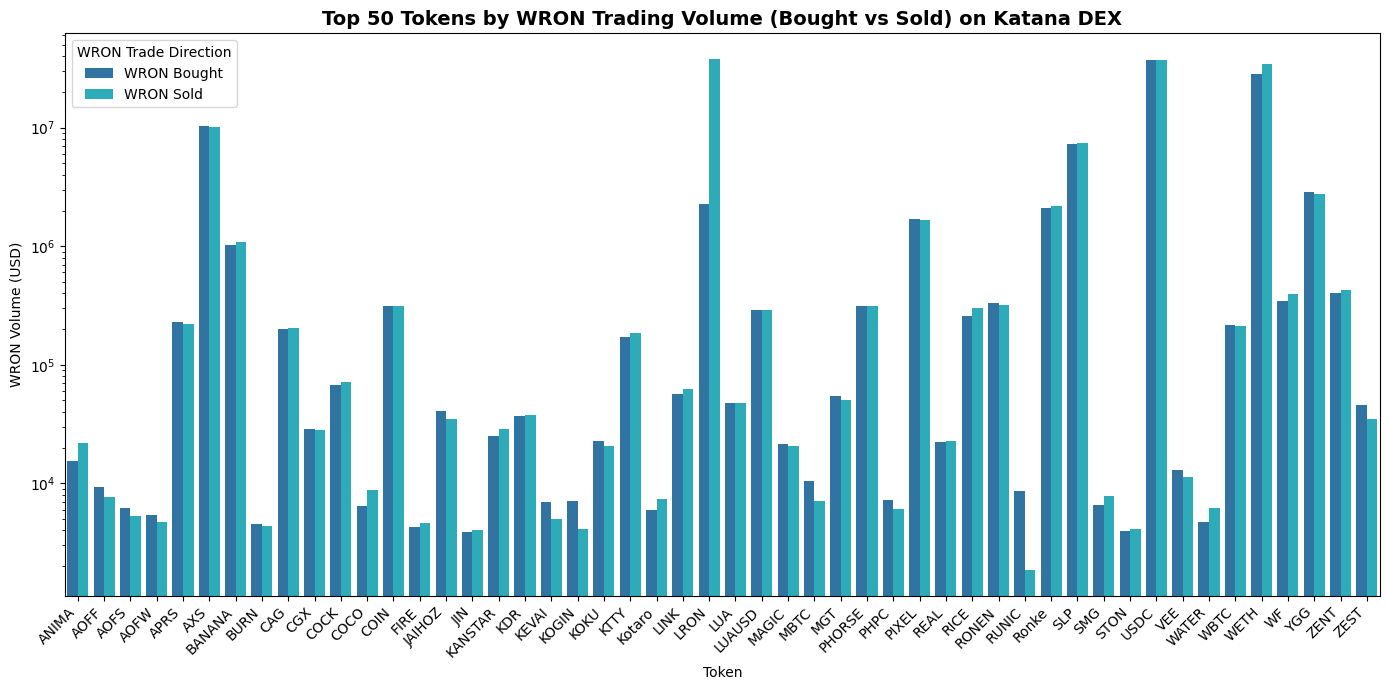

In [185]:
token_volume = WRON_Trading_Volume_Liquidity_Flow_on_Katana_df.groupby(
    ["Counterparty Token Symbol", "WRON Trade Direction"]
)["WRON Volume (USD)"].sum().reset_index()

top_tokens = token_volume.groupby("Counterparty Token Symbol")["WRON Volume (USD)"].sum().nlargest(50).index
top_token_volume = token_volume[token_volume["Counterparty Token Symbol"].isin(top_tokens)]

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=top_token_volume,
    x="Counterparty Token Symbol",
    y="WRON Volume (USD)",
    hue="WRON Trade Direction",
    palette={"WRON Bought": "#1f77b4", "WRON Sold": "#17becf"}
)

plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Top 50 Tokens by WRON Trading Volume (Bought vs Sold) on Katana DEX", fontsize=14, weight="bold")
plt.xlabel("Token")
plt.ylabel("WRON Volume (USD)")
plt.legend(title="WRON Trade Direction")
plt.tight_layout()
plt.show()


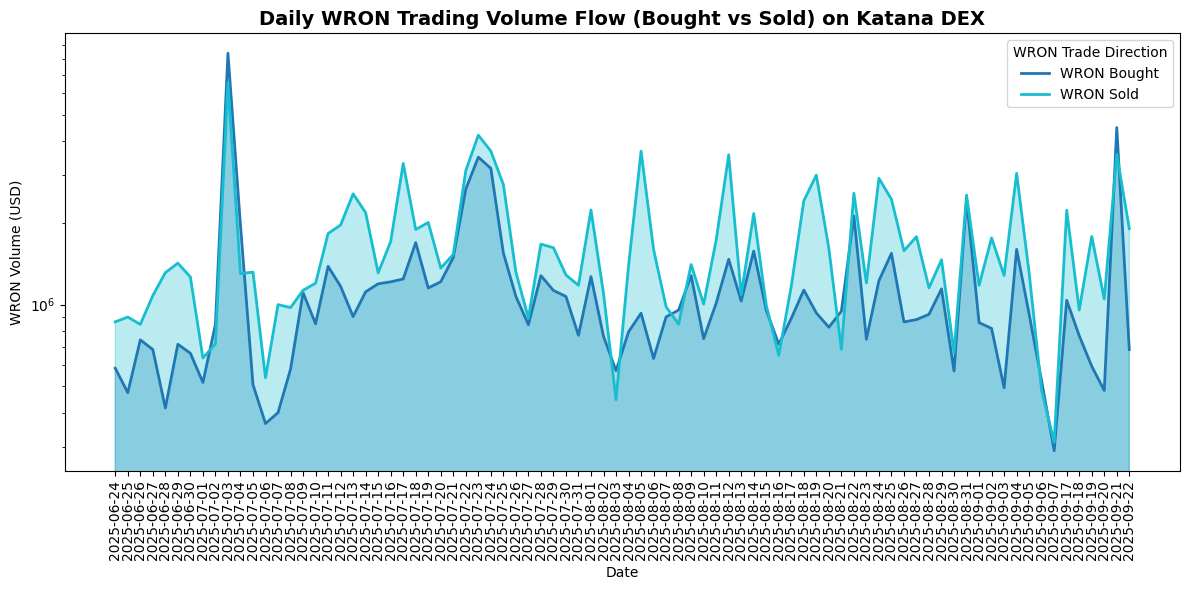

In [186]:
daily_flow = WRON_Trading_Volume_Liquidity_Flow_on_Katana_df.groupby(
    ["Trade Day", "WRON Trade Direction"]
)["WRON Volume (USD)"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=daily_flow,
    x="Trade Day",
    y="WRON Volume (USD)",
    hue="WRON Trade Direction",
    palette={"WRON Bought": "#1f77b4", "WRON Sold": "#17becf"},
    linewidth=2
)

plt.fill_between(
    daily_flow[daily_flow["WRON Trade Direction"] == "WRON Bought"]["Trade Day"],
    daily_flow[daily_flow["WRON Trade Direction"] == "WRON Bought"]["WRON Volume (USD)"],
    alpha=0.3,
    color="#1f77b4"
)
plt.fill_between(
    daily_flow[daily_flow["WRON Trade Direction"] == "WRON Sold"]["Trade Day"],
    daily_flow[daily_flow["WRON Trade Direction"] == "WRON Sold"]["WRON Volume (USD)"],
    alpha=0.3,
    color="#17becf"
)

plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Daily WRON Trading Volume Flow (Bought vs Sold) on Katana DEX", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("WRON Volume (USD)")
plt.legend(title="WRON Trade Direction")
plt.tight_layout()
plt.show()


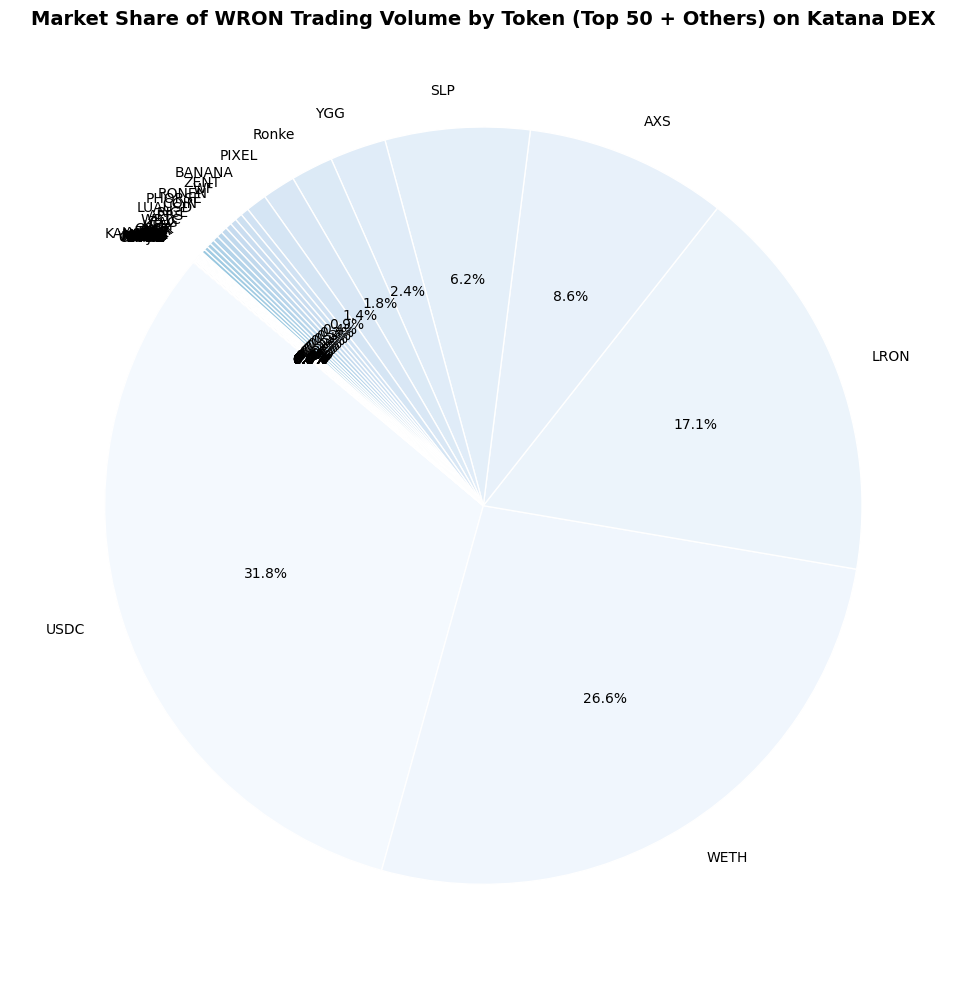

In [187]:
# Calculate total volume by token
token_market_share = WRON_Trading_Volume_Liquidity_Flow_on_Katana_df.groupby(
    "Counterparty Token Symbol"
)["WRON Volume (USD)"].sum().reset_index()

# Get top 50 tokens and group others
top_50_tokens = token_market_share.nlargest(50, "WRON Volume (USD)")
others = pd.DataFrame({
    "Counterparty Token Symbol": ["Others"],
    "WRON Volume (USD)": [token_market_share["WRON Volume (USD)"].sum() - top_50_tokens["WRON Volume (USD)"].sum()]
})
market_share_df = pd.concat([top_50_tokens, others])

plt.figure(figsize=(10, 10))
plt.pie(
    market_share_df["WRON Volume (USD)"],
    labels=market_share_df["Counterparty Token Symbol"],
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "w"},
    colors=sns.color_palette("Blues", len(market_share_df))
)
plt.title("Market Share of WRON Trading Volume by Token (Top 50 + Others) on Katana DEX", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


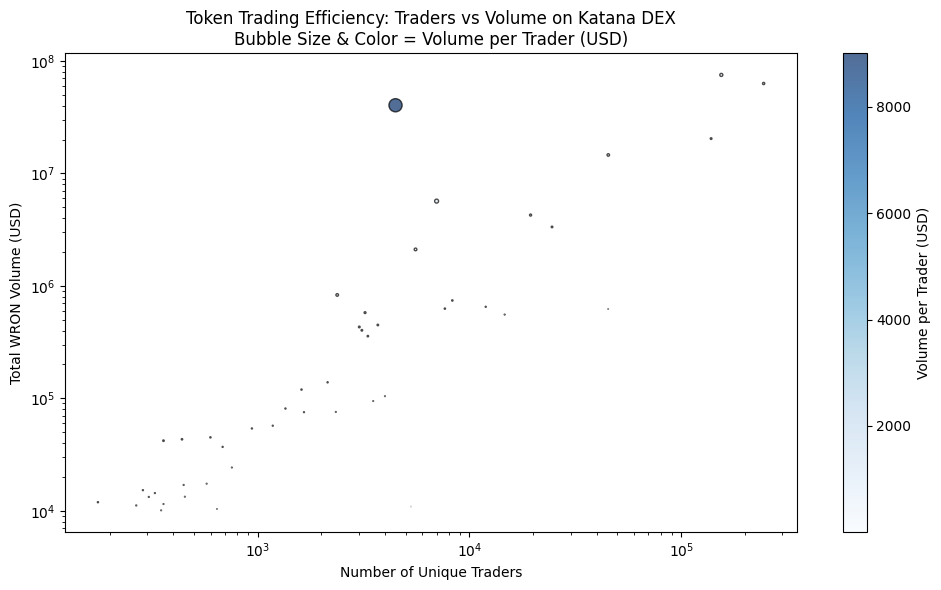

In [188]:
# Calculate average volume per trader by token
token_efficiency = WRON_Trading_Volume_Liquidity_Flow_on_Katana_df.groupby("Counterparty Token Symbol").agg({
    "WRON Volume (USD)": "sum",
    "Number of Unique Traders": "sum"
}).reset_index()

token_efficiency["Volume per Trader"] = (
    token_efficiency["WRON Volume (USD)"] / token_efficiency["Number of Unique Traders"]
)

# Filter for meaningful data (tokens with significant volume and traders)
significant_tokens = token_efficiency[
    (token_efficiency["WRON Volume (USD)"] > 10000) &
    (token_efficiency["Number of Unique Traders"] > 10)
]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    significant_tokens["Number of Unique Traders"],
    significant_tokens["WRON Volume (USD)"],
    s=significant_tokens["Volume per Trader"] / 100,  # scale bubble sizes
    c=significant_tokens["Volume per Trader"],
    cmap="Blues",
    alpha=0.7,
    edgecolor="k"
)

plt.xscale("log")
plt.yscale("log")
plt.colorbar(scatter, label="Volume per Trader (USD)")
plt.title("Token Trading Efficiency: Traders vs Volume on Katana DEX\nBubble Size & Color = Volume per Trader (USD)")
plt.xlabel("Number of Unique Traders")
plt.ylabel("Total WRON Volume (USD)")

plt.tight_layout()
plt.show()


In [189]:
WRON_Trading_by_hour_of_day_on_Katana_df

,avg trade size (USD),direction,hour of the day (UTC),trade volume (USD),trades count,unique traders
0,152.544941,WRON Bought,2025-08-23 00:00:00.000 UTC,83747.172514,509,289
1,119.286577,WRON Sold,2025-08-23 00:00:00.000 UTC,105926.480055,758,513
2,61.832023,WRON Bought,2025-08-23 01:00:00.000 UTC,39448.830914,559,320
3,69.301951,WRON Sold,2025-08-23 01:00:00.000 UTC,61055.018744,773,486
4,174.947779,WRON Bought,2025-08-23 02:00:00.000 UTC,123863.027571,613,300
...,...,...,...,...,...,...
1003,618.212354,WRON Sold,2025-09-22 06:00:00.000 UTC,553918.268875,857,245
1004,15.531290,WRON Bought,2025-09-22 07:00:00.000 UTC,5513.608013,257,196
1005,387.021136,WRON Sold,2025-09-22 07:00:00.000 UTC,202412.054006,411,209
1006,2.714145,WRON Bought,2025-09-22 08:00:00.000 UTC,81.424362,2,2


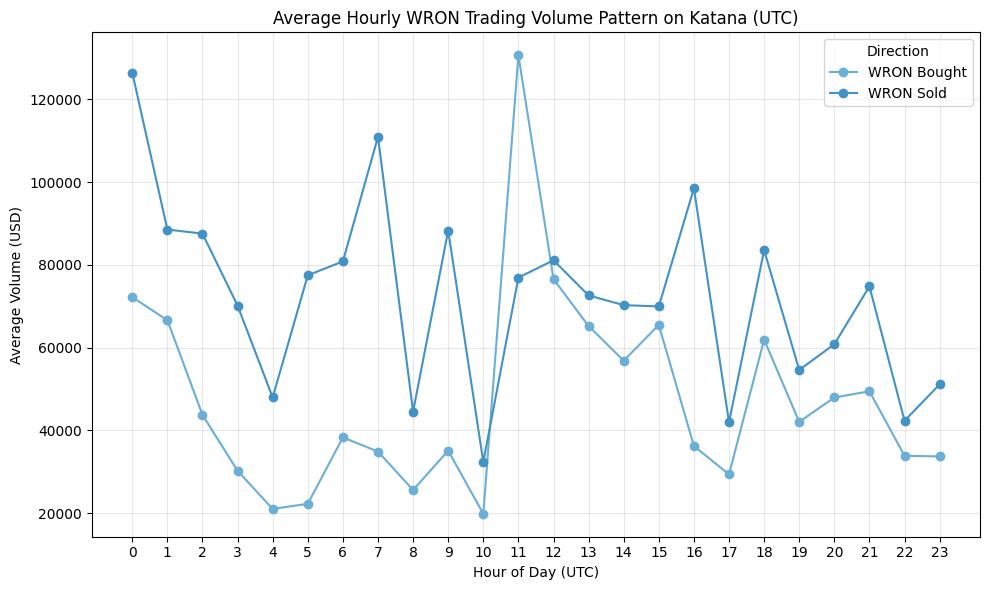

In [190]:
# First, extract just the hour from the timestamp
WRON_Trading_by_hour_of_day_on_Katana_df["hour"] = pd.to_datetime(
    WRON_Trading_by_hour_of_day_on_Katana_df["hour of the day (UTC)"]
).dt.hour

# Aggregate by hour and direction
hourly_volume = WRON_Trading_by_hour_of_day_on_Katana_df.groupby(
    ["hour", "direction"]
)["trade volume (USD)"].mean().reset_index()

plt.figure(figsize=(10, 6))
for direction in hourly_volume["direction"].unique():
    subset = hourly_volume[hourly_volume["direction"] == direction]
    plt.plot(
        subset["hour"],
        subset["trade volume (USD)"],
        marker="o",
        label=direction
    )

plt.xticks(range(0, 24, 1))
plt.title("Average Hourly WRON Trading Volume Pattern on Katana (UTC)")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average Volume (USD)")
plt.legend(title="Direction")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


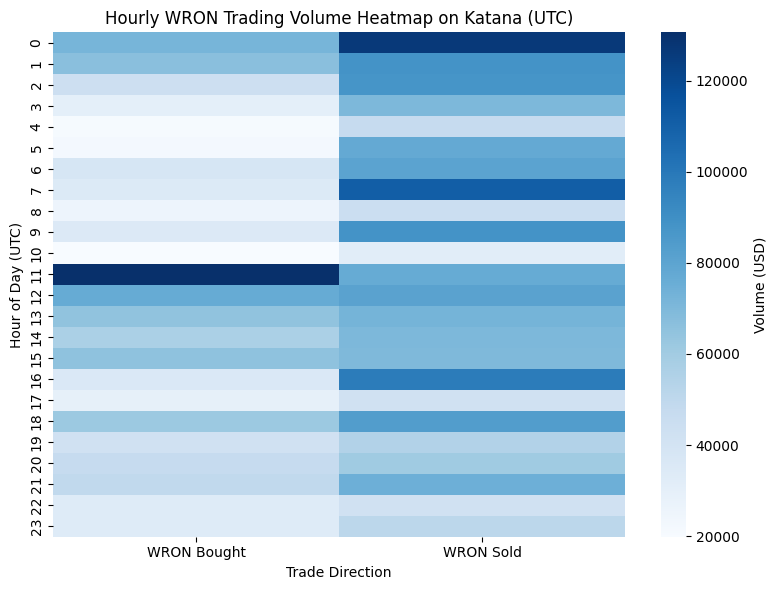

In [191]:
# Create pivot table for heatmap
heatmap_data = WRON_Trading_by_hour_of_day_on_Katana_df.pivot_table(
    values="trade volume (USD)",
    index="hour",
    columns="direction",
    aggfunc="mean",
    fill_value=0
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
    annot=False,
    cbar_kws={"label": "Volume (USD)"}
)

plt.title("Hourly WRON Trading Volume Heatmap on Katana (UTC)")
plt.xlabel("Trade Direction")
plt.ylabel("Hour of Day (UTC)")

plt.tight_layout()
plt.show()


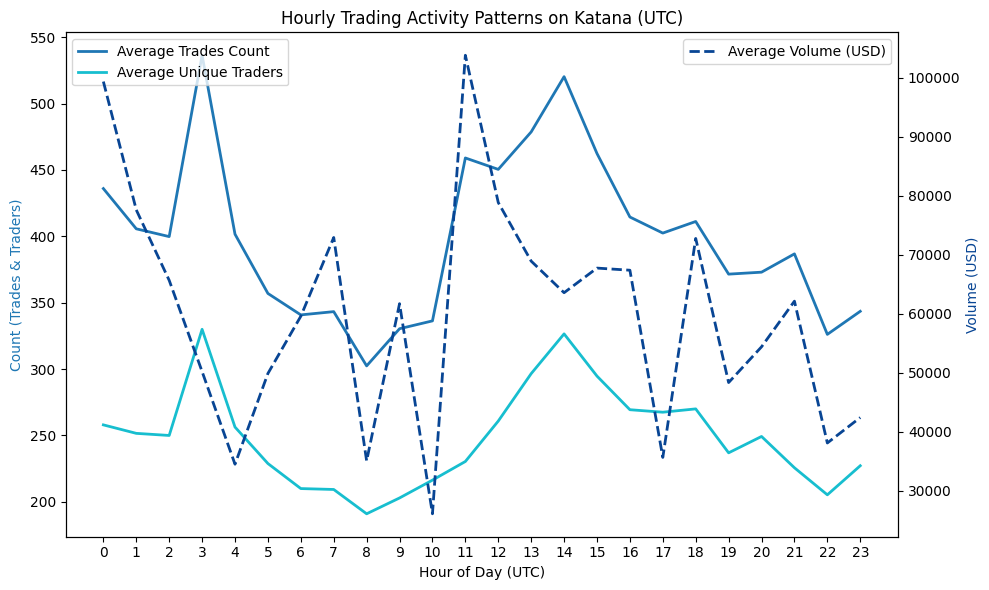

In [192]:
hourly_stats = WRON_Trading_by_hour_of_day_on_Katana_df.groupby("hour").agg({
    "trades count": "mean",
    "unique traders": "mean",
    "trade volume (USD)": "mean"
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

ax1.plot(hourly_stats["hour"], hourly_stats["trades count"], color="#1f77b4", linewidth=2, label="Average Trades Count")
ax1.plot(hourly_stats["hour"], hourly_stats["unique traders"], color="#17becf", linewidth=2, label="Average Unique Traders")
ax2.plot(hourly_stats["hour"], hourly_stats["trade volume (USD)"], color="#084594", linewidth=2, linestyle="--", label="Average Volume (USD)")

ax1.set_xlabel("Hour of Day (UTC)")
ax1.set_ylabel("Count (Trades & Traders)", color="#1f77b4")
ax2.set_ylabel("Volume (USD)", color="#084594")

ax1.set_xticks(range(0, 24))
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Hourly Trading Activity Patterns on Katana (UTC)")
plt.tight_layout()
plt.show()


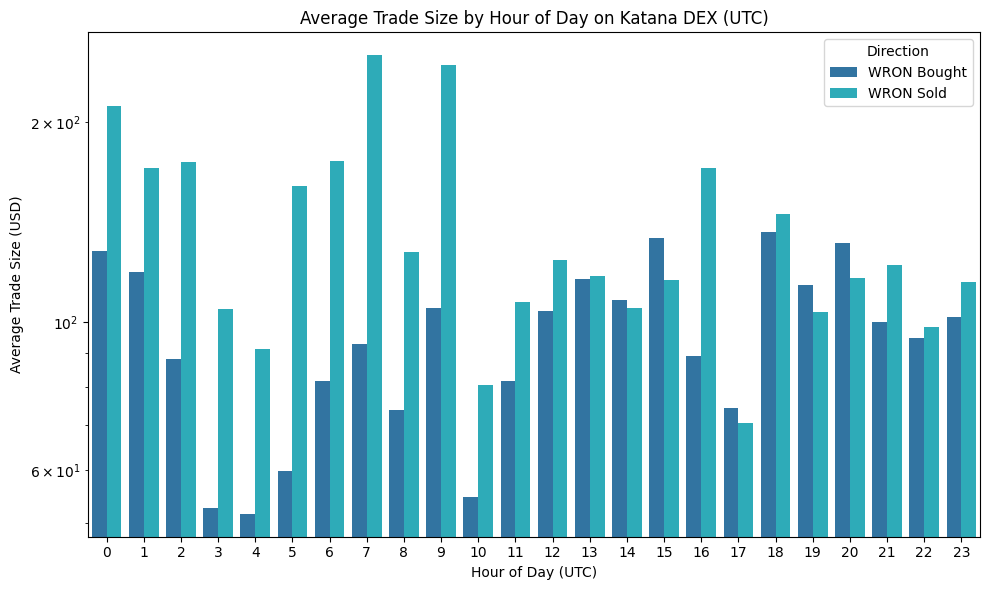

In [193]:
hourly_trade_size = WRON_Trading_by_hour_of_day_on_Katana_df.groupby(
    ["hour", "direction"]
)["avg trade size (USD)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=hourly_trade_size,
    x="hour",
    y="avg trade size (USD)",
    hue="direction",
    palette={"WRON Bought": "#1f77b4", "WRON Sold": "#17becf"}
)

plt.yscale("log")
plt.title("Average Trade Size by Hour of Day on Katana DEX (UTC)")
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(range(0, 24))
plt.legend(title="Direction")
plt.tight_layout()
plt.show()


In [194]:
WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df

,Amount Category,USD Volume,Weekly active users,trade week
0,Medium value trades,2.013251e+06,187,2025-09-22 00:00:00.000 UTC
1,Micro trades,1.496121e+04,2073,2025-09-22 00:00:00.000 UTC
2,Small trades,8.398143e+04,521,2025-09-22 00:00:00.000 UTC
3,Hyper value trades,NaN,187,2025-09-22 00:00:00.000 UTC
4,High value trades,8.330152e+05,15,2025-09-22 00:00:00.000 UTC
...,...,...,...,...
1008,Micro trades,1.145293e+05,17921,2021-11-01 00:00:00.000 UTC
1009,Hyper value trades,2.597501e+08,294,2021-11-01 00:00:00.000 UTC
1010,Medium value trades,1.233201e+08,102862,2021-11-01 00:00:00.000 UTC
1011,High value trades,1.124662e+08,2866,2021-11-01 00:00:00.000 UTC


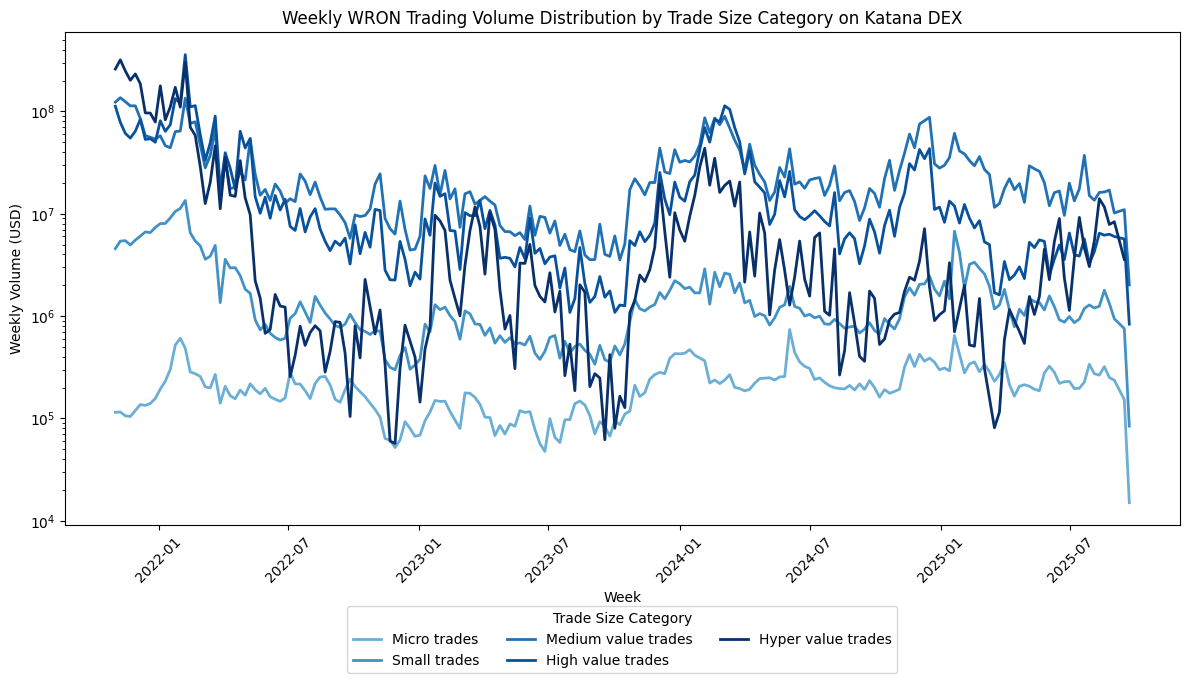

In [195]:
WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df["trade_week"] = pd.to_datetime(
    WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df["trade week"]
).dt.date

category_order = [
    "Micro trades",
    "Small trades",
    "Medium value trades",
    "High value trades",
    "Hyper value trades",
]

plt.figure(figsize=(12, 7))
sns.set_palette(["#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"])

sns.lineplot(
    data=WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df,
    x="trade_week",
    y="USD Volume",
    hue="Amount Category",
    hue_order=category_order,
    linewidth=2,
)

plt.yscale("log")
plt.title("Weekly WRON Trading Volume Distribution by Trade Size Category on Katana DEX")
plt.xlabel("Week")
plt.ylabel("Weekly Volume (USD)")
plt.xticks(rotation=45)
plt.legend(title="Trade Size Category", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()


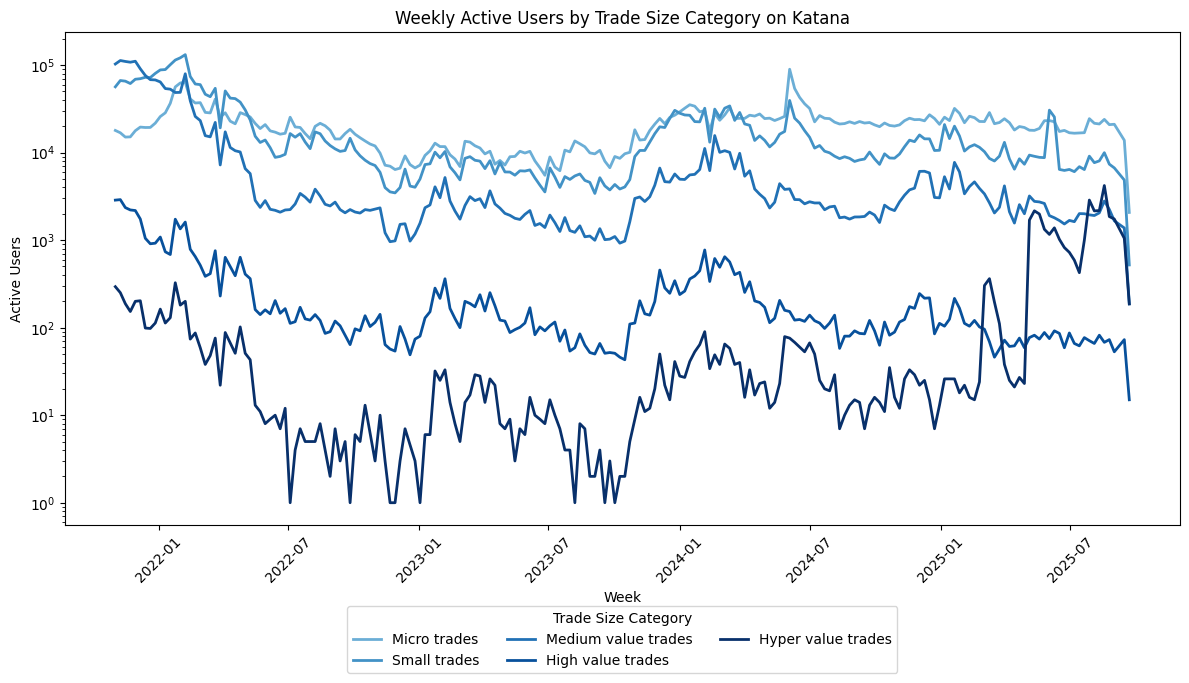

In [196]:
plt.figure(figsize=(12, 7))
sns.set_palette(["#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"])

sns.lineplot(
    data=WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df,
    x="trade_week",
    y="Weekly active users",
    hue="Amount Category",
    hue_order=category_order,
    linewidth=2,
)

plt.yscale("log")
plt.title("Weekly Active Users by Trade Size Category on Katana")
plt.xlabel("Week")
plt.ylabel("Active Users")
plt.xticks(rotation=45)
plt.legend(
    title="Trade Size Category", 
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.15), 
    ncol=3
)
plt.tight_layout()
plt.show()


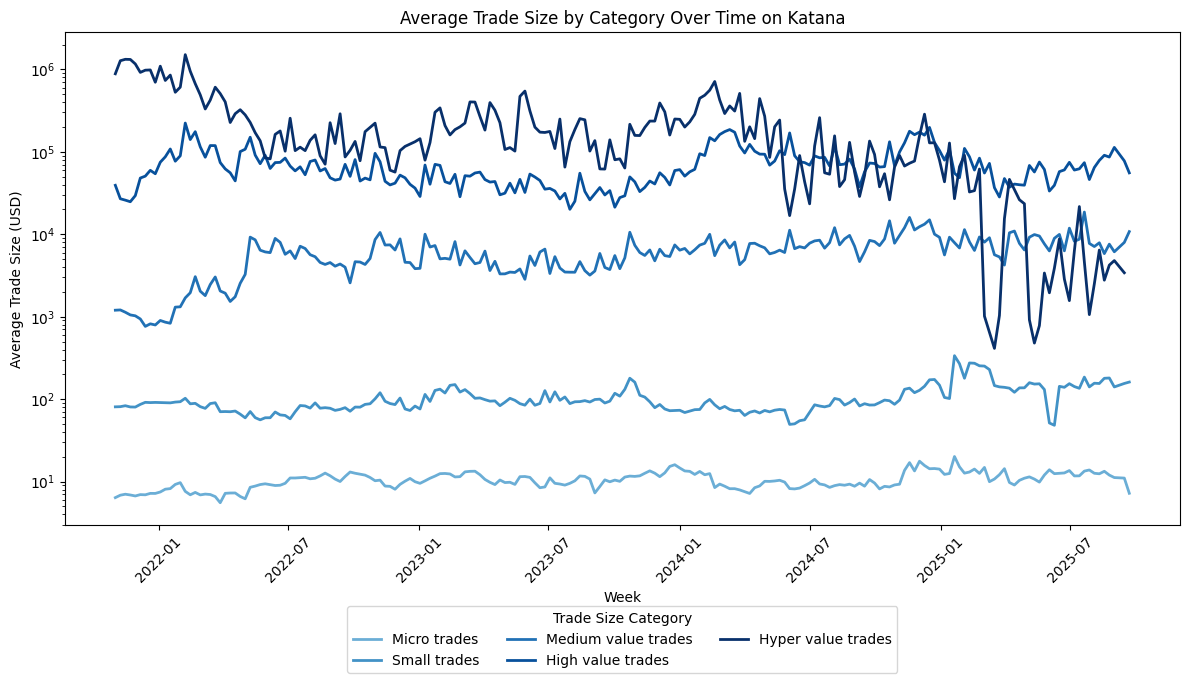

In [197]:
weekly_avg_trade = WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df.copy()
weekly_avg_trade["avg_trade_size"] = (
    weekly_avg_trade["USD Volume"] / weekly_avg_trade["Weekly active users"]
)

plt.figure(figsize=(12, 7))
sns.set_palette(["#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"])

sns.lineplot(
    data=weekly_avg_trade,
    x="trade_week",
    y="avg_trade_size",
    hue="Amount Category",
    hue_order=category_order,
    linewidth=2,
)

plt.yscale("log")
plt.title("Average Trade Size by Category Over Time on Katana")
plt.xlabel("Week")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.legend(
    title="Trade Size Category",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)
plt.tight_layout()
plt.show()


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\512340954.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




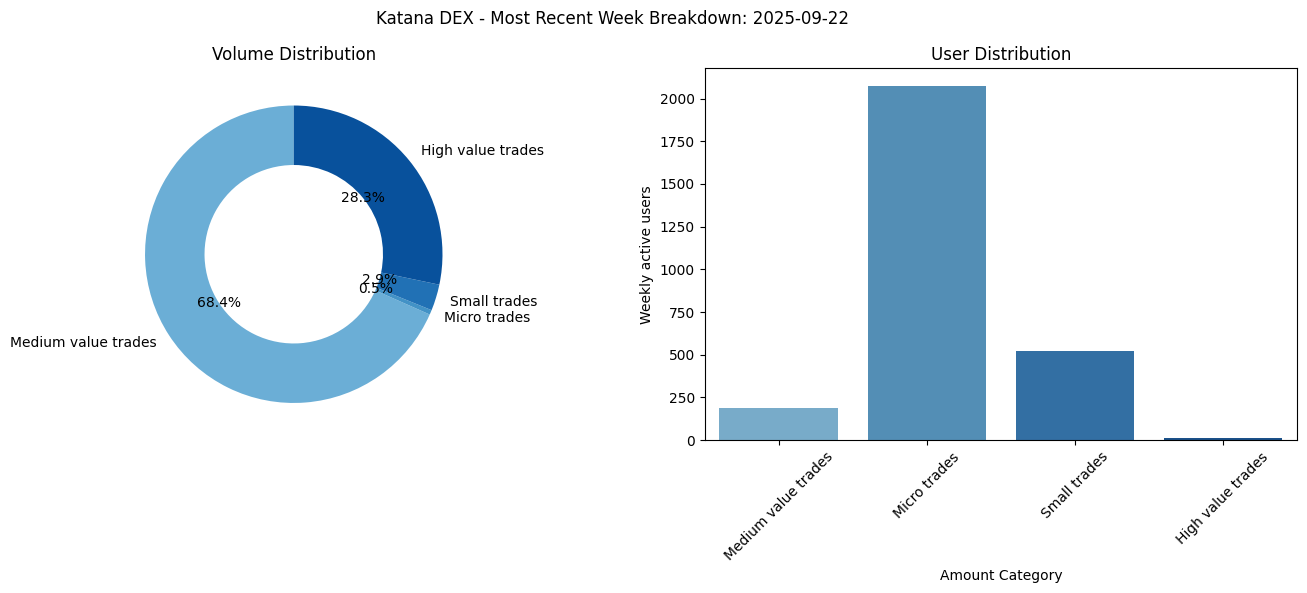

In [198]:
recent_week = WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df[
    WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df["trade_week"]
    == WRON_weekly_trade_volume_and_user_segmentation_on_Katana_df["trade_week"].max()
].copy()

# Clean data: drop rows with NaN or zero volume
recent_week = recent_week.dropna(subset=["USD Volume"])
recent_week = recent_week[recent_week["USD Volume"] > 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ["#6baed6", "#4292c6", "#2171b5", "#08519c", "#08306b"]

# Volume Pie Chart
axes[0].pie(
    recent_week["USD Volume"],
    labels=recent_week["Amount Category"],
    colors=colors[: len(recent_week)],  # match number of categories
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),
)
axes[0].set_title("Volume Distribution")

# User Bar Chart
sns.barplot(
    data=recent_week,
    x="Amount Category",
    y="Weekly active users",
    palette=colors[: len(recent_week)],
    ax=axes[1],
)
axes[1].set_title("User Distribution")
axes[1].tick_params(axis="x", rotation=45)

fig.suptitle(
    f"Katana DEX - Most Recent Week Breakdown: {recent_week['trade_week'].iloc[0]}"
)
plt.tight_layout()
plt.show()


In [199]:
nft_collections_on_sky_mavis

,floor price (RON),floor price (USD),holders,nft contract address,generated platform fees (RON),generated platform fees (USD),generated Ronin fees (RON),generated Ronin fees (USD),royalty_ron,royalty_usd,sales,token standard,sales volume (RON),sales volume (USD)
0,3.500000,1.949798,190,0x538995d165e816ec6fbd6788f132f6bc8323d509,9.088700,4.806918,2.272175,1.201730,41.643500,22.224418,78,erc721,4.544350e+02,2.403459e+02
1,0.883859,1.164832,4388,0xcedb8e5c29dc498b8d805852b531849af91dfae3,2492.658218,6635.752569,623.164554,1658.938142,5608.480990,14930.443280,17027,erc721,1.246329e+05,3.317876e+05
2,3.000000,1.538944,1062,0x4c249bb5434c0638279f8e5dc54f732777f624ff,57.933080,30.395178,14.483270,7.598795,100.073200,52.126283,614,erc721,2.896654e+03,1.519759e+03
3,61.973906,90.853162,2907,0x47b5a7c2e4f07772696bbf8c8c32fe2b9eabd550,37552.462380,49530.101172,9388.115595,12382.525293,93881.155950,123825.252930,12467,erc721,1.877623e+06,2.476505e+06
4,0.817343,0.864626,21561,0x67c409dab0ee741a1b1be874bd1333234cfdbf44,373.871696,657.404934,93.467925,164.351234,13307.323107,28152.535889,966,erc721,1.869358e+04,3.287025e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.000000,0.601733,64,0x1d0af9a2c70eb76035e1ae1595c1d1cd237970ad,0.199800,0.118216,0.049950,0.029554,0.499500,0.295540,10,erc1155,9.990000e+00,5.910810e+00
205,1860.000000,903.279240,19,0x653c46b81ace7f93ccb1cfc182f9abb0b285dc67,115.200000,58.966327,28.800000,14.741582,432.000000,221.123725,3,erc1155,5.760000e+03,2.948316e+03
206,10.058790,4.800896,121,0x3a880ffc52afc121aad734722db436126a2b7438,1042.965470,517.710075,260.741368,129.427519,3004.191469,1470.630026,1180,erc1155,5.214827e+04,2.588550e+04
207,15.000000,8.078085,13,0x33fb36ad2c157dbe1f5a5a972162ac8408bed858,47.440000,22.554092,11.860000,5.638523,118.600000,56.385229,21,erc1155,2.372000e+03,1.127705e+03


C:\Users\Jo$h\AppData\Local\Temp\ipykernel_17828\2712527645.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




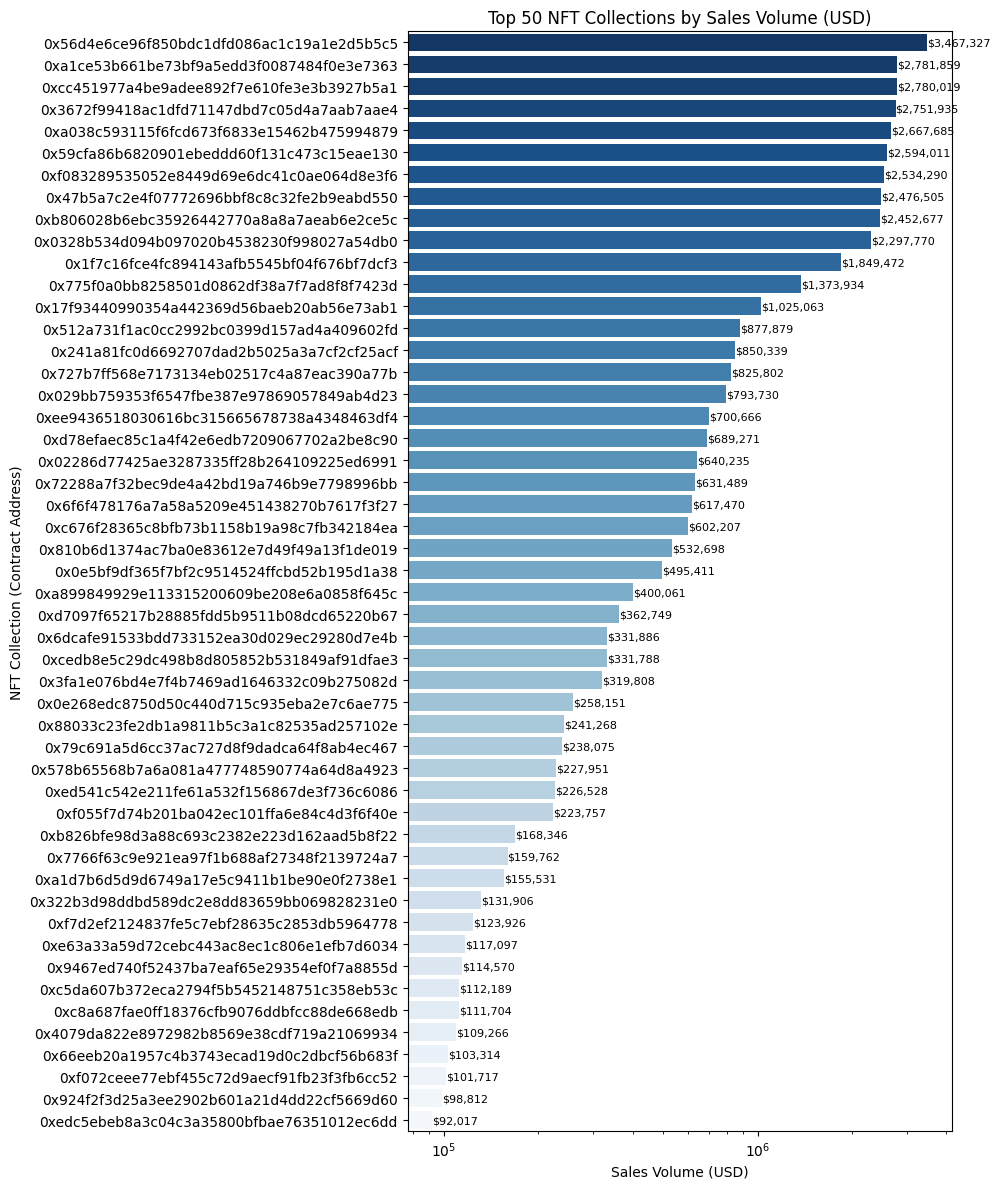

In [200]:
top_collections = nft_collections_on_sky_mavis.nlargest(50, "sales volume (USD)")

fig, ax = plt.subplots(figsize=(10, 12))

sns.barplot(
    data=top_collections,
    x="sales volume (USD)",
    y="nft contract address",
    palette="Blues_r",
    ax=ax,
)

ax.set_xscale("log")
ax.set_title("Top 50 NFT Collections by Sales Volume (USD)")
ax.set_xlabel("Sales Volume (USD)")
ax.set_ylabel("NFT Collection (Contract Address)")

for i, v in enumerate(top_collections["sales volume (USD)"]):
    ax.text(
        v,
        i,
        f"${v:,.0f}",
        va="center",
        ha="left",
        fontsize=8,
    )

plt.tight_layout()
plt.show()


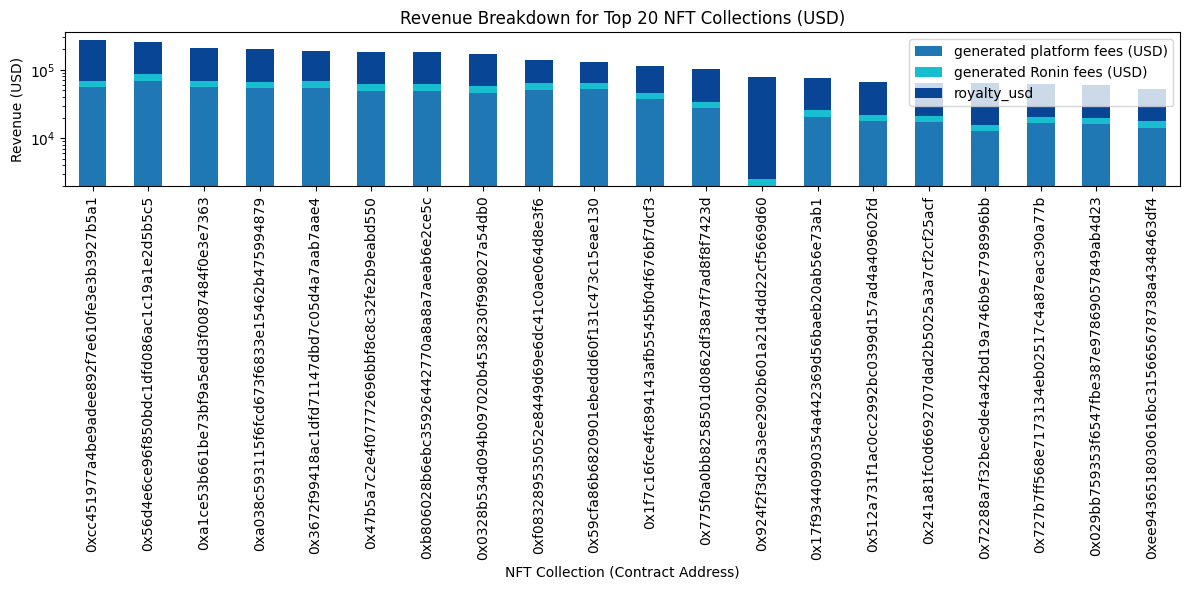

In [201]:
nft_collections_on_sky_mavis["total_revenue_usd"] = (
    nft_collections_on_sky_mavis["generated platform fees (USD)"]
    + nft_collections_on_sky_mavis["generated Ronin fees (USD)"]
    + nft_collections_on_sky_mavis["royalty_usd"]
)

top_revenue = nft_collections_on_sky_mavis.nlargest(20, "total_revenue_usd")

fig, ax = plt.subplots(figsize=(12, 6))

top_revenue.set_index("nft contract address")[[
    "generated platform fees (USD)",
    "generated Ronin fees (USD)",
    "royalty_usd"
]].plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#1f77b4", "#17becf", "#084594"]
)

ax.set_yscale("log")
ax.set_title("Revenue Breakdown for Top 20 NFT Collections (USD)")
ax.set_xlabel("NFT Collection (Contract Address)")
ax.set_ylabel("Revenue (USD)")
ax.tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()


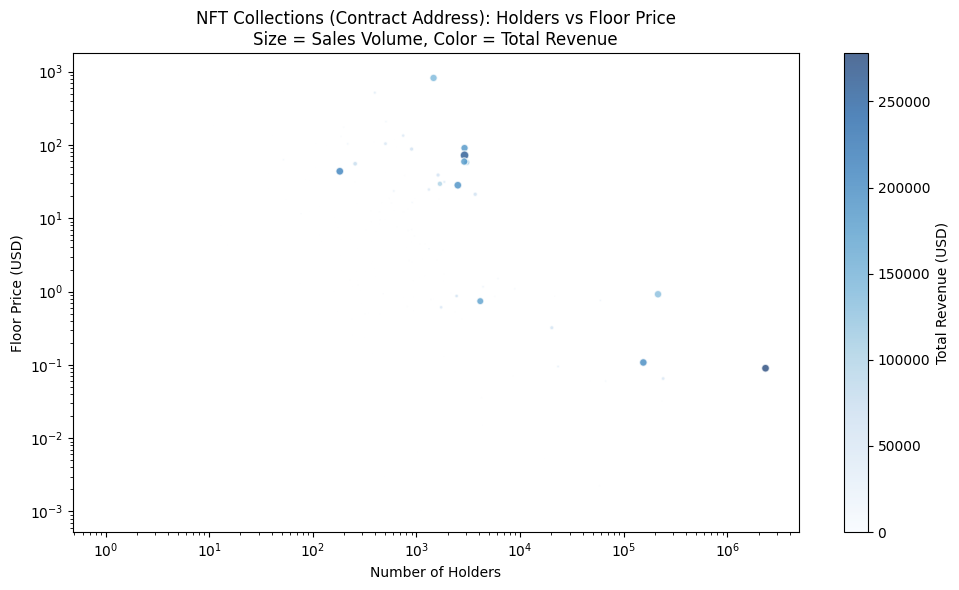

In [202]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    nft_collections_on_sky_mavis["holders"],
    nft_collections_on_sky_mavis["floor price (USD)"],
    s=nft_collections_on_sky_mavis["sales volume (USD)"] / nft_collections_on_sky_mavis["sales volume (USD)"].max() * 40,
    c=nft_collections_on_sky_mavis["total_revenue_usd"],
    cmap="Blues",
    alpha=0.7,
    edgecolors="w"
)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_title("NFT Collections (Contract Address): Holders vs Floor Price\nSize = Sales Volume, Color = Total Revenue")
ax.set_xlabel("Number of Holders")
ax.set_ylabel("Floor Price (USD)")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Total Revenue (USD)")

plt.tight_layout()
plt.show()


In [203]:
last_updated = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S UTC")

print(f"📊 Metrics last updated: {last_updated}")

📊 Metrics last updated: 2025-09-22 11:47:55 UTC
